# MAROUANE ZAIZOUNE
# Data science Internship
# LetsGrowMore
# Beginner Level
# Task 2: Stock Market Prediction And Forecasting Using Stacked LSTM

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

## Loading the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
df = df.iloc[::-1]

In [5]:
df = df.reset_index()['High']

In [6]:
df.head()

0    123.00
1    122.00
2    121.95
3    121.00
4    119.50
Name: High, dtype: float64

In [7]:
df.tail()

2030    239.20
2031    236.75
2032    240.00
2033    236.80
2034    235.95
Name: High, dtype: float64

## Data Preprocessing

In [8]:
df.isnull().sum()

0

In [9]:
df.duplicated().sum()

778

## Data Visualization

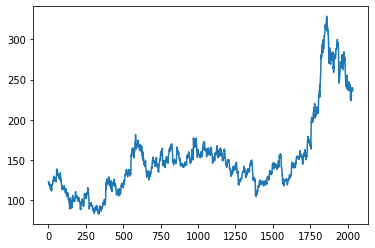

In [10]:
plt.plot(df)

Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

In [11]:
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
df.shape

(2035, 1)

In [13]:
#Split the data into train and test split

training_size = int(len(df) * 0.75)
test_size = len(df) - training_size
train_data, test_data = df[0:training_size,:], df[training_size:len(df),:1]

In [14]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [15]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

## Create the LSTM Model

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 33s 629ms/step - loss: 0.0125 - val_loss: 0.0599
Epoch 2/100
23/23 [==============================] - 9s 381ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 3/100
23/23 [==============================] - 9s 383ms/step - loss: 8.8433e-04 - val_loss: 0.0035
Epoch 4/100
23/23 [==============================] - 9s 381ms/step - loss: 8.3021e-04 - val_loss: 0.0032
Epoch 5/100
23/23 [==============================] - 10s 431ms/step - loss: 7.8517e-04 - val_loss: 0.0036
Epoch 6/100
23/23 [==============================] - 9s 380ms/step - loss: 7.4639e-04 - val_loss: 0.0033
Epoch 7/100
23/23 [==============================] - 9s 381ms/step - loss: 7.1026e-04 - val_loss: 0.0043
Epoch 8/100
23/23 [==============================] - 9s 379ms/step - loss: 6.8471e-04 - val_loss: 0.0029
Epoch 9/100
23/23 [==============================] - 9s 383ms/step - loss: 7.4681e-04 - val_loss: 0.0054
Epoch 10/100
23/23 [==============================] - 9s 381m

## Evaluation

In [18]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [19]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [20]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

135.7132294619925

In [21]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

225.54439594087617

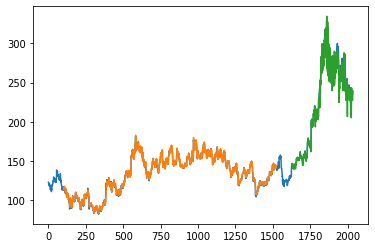

In [22]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

* Green indicates the Predicted Data
* Blue indicates the Complete Data
* Orange indicates the Train Data



## Predict the next 7 days Stock Price

In [23]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [24]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [25]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [26]:
lst_output=[]
n_steps=100
nextNumberOfDays = 7
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.60863316]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 

In [27]:
day_new = np.arange(1,101)
day_pred = np.arange(101,108)

In [28]:
day_new.shape

(100,)

In [29]:
day_pred.shape

(7,)

In [30]:
len(lst_output)

7

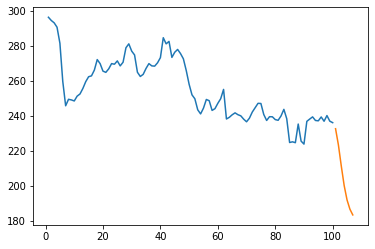

In [31]:
plt.plot(day_new, scaler.inverse_transform(df[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

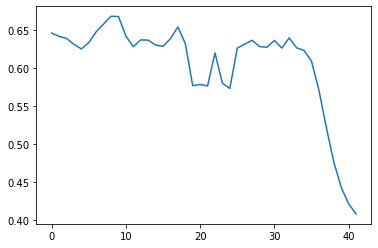

In [32]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[2000:])

In [33]:
df2 = scaler.inverse_transform(df1).tolist()

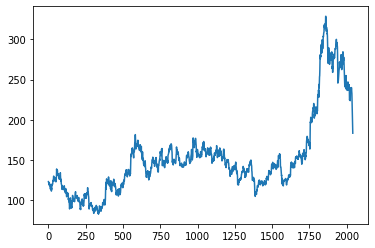

In [34]:
plt.plot(df2)